In [ ]:
%pip install pandas seaborn matplotlib numpy scikit-learn

Para comenzar importaremos las librerías necesarias para llevar a cabo la práctica

In [ ]:
import pandas as pd
import seaborn as sea
import time
import numpy as np
import matplotlib.pyplot as plt
import pickle

Extraemos los datos proporcionados por el profesorado en dos pandas dataframes, uno para los datos disponibles y otro para los datos de competición

In [ ]:
disp_df = pd.read_csv("disp_st21ns1.txt.bz2",
          compression="bz2", 
          index_col=0)

comp_df = pd.read_csv("comp_st21ns1.txt.bz2", 
          compression="bz2", 
          index_col=0)

Antes de comenzar el análisis exploratorio de los datos es apropiado conocer algunas carácterísticas de los datos

In [ ]:
print("La forma de disp_df es: {}".format(disp_df.shape))
print("\nEl numero de valores perdidos es: ")
print(disp_df.isnull().sum())
print("\nLa fraccion de valores perdidos es: ")
print(disp_df.isnull().mean())

Podemos ver que nuestros datos tienen 4380 entradas y 76 columnas en las que se incluye la salida.

A continuación comprobamos el tipo de datos de las columnas para ver que todos son tipo float a excepción de la salida que es un entero.

In [ ]:
print("\nLos tipos de los atributos son: \n")
print(disp_df.info())

Por último, mostramos una muestra para conocer del todo la estructura de los datos.

In [55]:
print(disp_df.head())

    apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1         0.0    0.000000    0.000000    0.000000    0.000000  259.492673   
V2         0.0    0.000000    0.012727    0.059091    0.662727  254.725868   
V3         0.0    0.000000    0.000000    0.000000    0.004545  215.280002   
V4         0.0    0.000909    0.000000    0.000000    0.000000  240.408503   
V5         0.0    0.000000    0.000000    0.000000    0.000000  233.435475   

    dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  ...  ulwrf_t2_1  \
V1  245.787096  251.719940  265.741308  264.195623  ...  249.231748   
V2  287.278670  300.254822  305.623560  309.383628  ...  201.094627   
V3  210.086931  215.133093  239.983668  245.567405  ...  229.283282   
V4  238.623817  246.948127  239.910919  237.894957  ...  237.462230   
V5  237.927051  245.669004  270.759064  279.572826  ...  231.524841   

    ulwrf_t3_1  ulwrf_t4_1  ulwrf_t5_1  uswrf_s1_1  uswrf_s2_1  uswrf_s3_1  \
V1  251.032998  258.342404

Ahora que estamos más familiarizados con los datos, vamos a comenzar la parte más importante del análisis exploratorio de los datos. Para ello, utilizaremos matrices de correlación pues por el número de columnas disponibles es complicado analizarlas una a una.

En concreto vamos a realizar 5 matrices de correlación agrupando las columnas en 5 grupos según la hora del día que representan. Actualmente contamos con "disp_df" en el cual están todas juntas por lo que habra que dividirlos primero.

In [56]:
# Columnas de la franja de hora 1:
columns_1 = disp_df.columns[disp_df.columns.str.endswith('1_1')]
disp_df1 = disp_df.loc[:,columns_1]

# Columnas de la franja de hora 2:

columns_2 = disp_df.columns[disp_df.columns.str.endswith('2_1')]
disp_df2 = disp_df.loc[:,columns_2]

# Columnas de la franja de hora 3:
columns_3 = disp_df.columns[disp_df.columns.str.endswith('3_1')]
disp_df3 = disp_df.loc[:,columns_3]

# Columnas de la franja de hora 4:
columns_4 = disp_df.columns[disp_df.columns.str.endswith('4_1')]
disp_df4 = disp_df.loc[:,columns_4]

# Columnas de la franja de hora 5:
columns_5 = disp_df.columns[disp_df.columns.str.endswith('5_1')]
disp_df5 = disp_df.loc[:,columns_5]

corr_matrix1 = disp_df1.corr()

corr_matrix2 = disp_df2.corr()

corr_matrix3 = disp_df3.corr()

corr_matrix4 = disp_df4.corr()

corr_matrix5 = disp_df5.corr()

Mostramos Matriz 1:

La matriz de correlacion 1 es: 

            apcp_sf1_1  dlwrf_s1_1  dswrf_s1_1  pres_ms1_1  pwat_ea1_1  \
apcp_sf1_1    1.000000    0.272664   -0.001553   -0.168738    0.319918   
dlwrf_s1_1    0.272664    1.000000    0.221936   -0.576028    0.911788   
dswrf_s1_1   -0.001553    0.221936    1.000000   -0.104149    0.221094   
pres_ms1_1   -0.168738   -0.576028   -0.104149    1.000000   -0.436834   
pwat_ea1_1    0.319918    0.911788    0.221094   -0.436834    1.000000   
spfh_2m1_1    0.234057    0.914050    0.255586   -0.540412    0.901647   
tcdc_ea1_1    0.604816    0.207977   -0.041831   -0.107998    0.226208   
tcolc_e1_1    0.604853    0.207742   -0.041909   -0.107987    0.226051   
tmax_2m1_1    0.108320    0.900389    0.242752   -0.593120    0.795255   
tmin_2m1_1    0.123036    0.916958    0.238853   -0.601203    0.824413   
tmp_2m_1_1    0.125709    0.920802    0.243009   -0.606706    0.828739   
tmp_sfc1_1    0.139441    0.933120    0.245059   -0.604825    0.844014   
ulwrf

<Axes: >

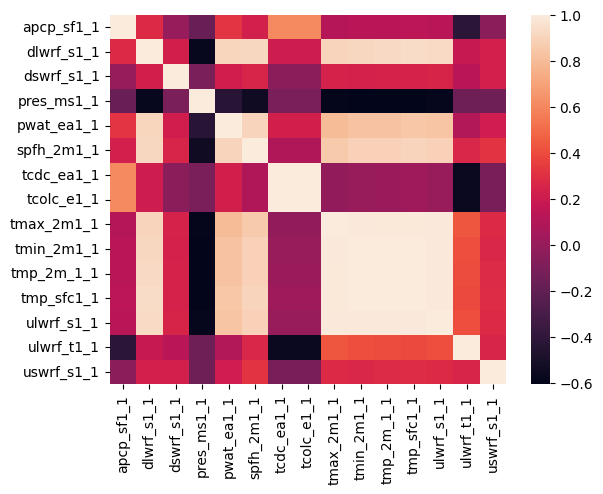

In [57]:
print("La matriz de correlacion 1 es: \n")
print(corr_matrix1)
sea.heatmap(corr_matrix1)

Mostramos Matriz 2:

La matriz de correlacion 2 es: 

            apcp_sf2_1  dlwrf_s2_1  dswrf_s2_1  pres_ms2_1  pwat_ea2_1  \
apcp_sf2_1    1.000000    0.215907   -0.148815   -0.130354    0.257231   
dlwrf_s2_1    0.215907    1.000000    0.504165   -0.569419    0.922055   
dswrf_s2_1   -0.148815    0.504165    1.000000   -0.300135    0.483689   
pres_ms2_1   -0.130354   -0.569419   -0.300135    1.000000   -0.436530   
pwat_ea2_1    0.257231    0.922055    0.483689   -0.436530    1.000000   
spfh_2m2_1    0.124134    0.921451    0.672917   -0.534521    0.898384   
tcdc_ea2_1    0.653454    0.211491   -0.301237   -0.102039    0.198115   
tcolc_e2_1    0.653645    0.211335   -0.301031   -0.102070    0.198040   
tmax_2m2_1    0.031619    0.874483    0.752895   -0.564677    0.797152   
tmin_2m2_1    0.080200    0.916462    0.669969   -0.599439    0.836272   
tmp_2m_2_1    0.027567    0.871073    0.755748   -0.561579    0.795578   
tmp_sfc2_1    0.011482    0.855774    0.778019   -0.539346    0.785383   
ulwrf

<Axes: >

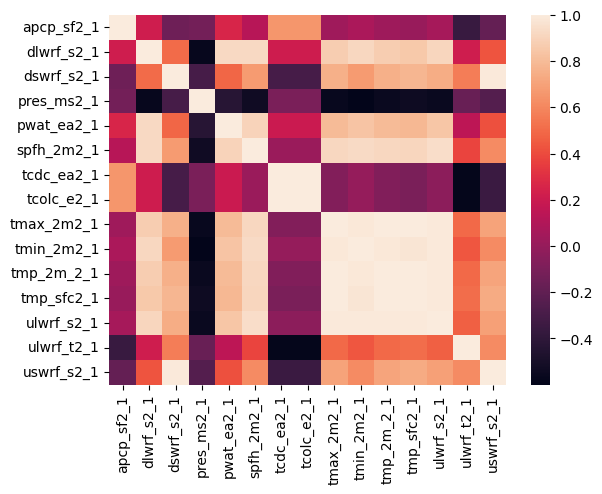

In [58]:
print("La matriz de correlacion 2 es: \n")
print(corr_matrix2)
sea.heatmap(corr_matrix2)

Mostramos Matriz 3:

La matriz de correlacion 3 es: 

            apcp_sf3_1  dlwrf_s3_1  dswrf_s3_1  pres_ms3_1  pwat_ea3_1  \
apcp_sf3_1    1.000000    0.200123   -0.279297   -0.130400    0.236597   
dlwrf_s3_1    0.200123    1.000000    0.397619   -0.559351    0.921991   
dswrf_s3_1   -0.279297    0.397619    1.000000   -0.226816    0.389710   
pres_ms3_1   -0.130400   -0.559351   -0.226816    1.000000   -0.429041   
pwat_ea3_1    0.236597    0.921991    0.389710   -0.429041    1.000000   
spfh_2m3_1    0.110158    0.929436    0.585605   -0.526655    0.908773   
tcdc_ea3_1    0.603702    0.151199   -0.419529   -0.079714    0.173319   
tcolc_e3_1    0.603641    0.151184   -0.419253   -0.079802    0.173349   
tmax_2m3_1   -0.032994    0.847355    0.716443   -0.548253    0.768261   
tmin_2m3_1    0.072012    0.930203    0.582216   -0.585104    0.842266   
tmp_2m_3_1   -0.040092    0.842606    0.720051   -0.545668    0.764940   
tmp_sfc3_1   -0.093503    0.783604    0.749915   -0.498908    0.716086   
ulwrf

<Axes: >

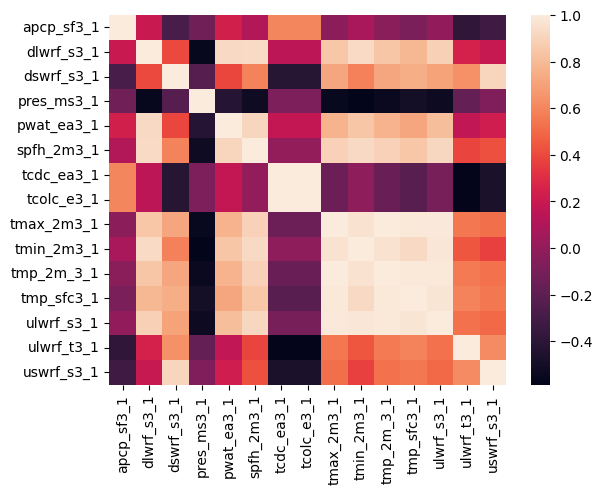

In [59]:
print("La matriz de correlacion 3 es: \n")
print(corr_matrix3)
sea.heatmap(corr_matrix3)

Mostramos Matriz 4:

La matriz de correlacion 4 es: 

            apcp_sf4_1  dlwrf_s4_1  dswrf_s4_1  pres_ms4_1  pwat_ea4_1  \
apcp_sf4_1    1.000000    0.153353   -0.315320   -0.121135    0.239859   
dlwrf_s4_1    0.153353    1.000000    0.354637   -0.543335    0.924876   
dswrf_s4_1   -0.315320    0.354637    1.000000   -0.172960    0.294598   
pres_ms4_1   -0.121135   -0.543335   -0.172960    1.000000   -0.416938   
pwat_ea4_1    0.239859    0.924876    0.294598   -0.416938    1.000000   
spfh_2m4_1    0.125770    0.943541    0.474147   -0.509443    0.916079   
tcdc_ea4_1    0.674661    0.101048   -0.522636   -0.053807    0.165379   
tcolc_e4_1    0.674663    0.101016   -0.522309   -0.053910    0.165317   
tmax_2m4_1   -0.030976    0.883056    0.647084   -0.542931    0.763980   
tmin_2m4_1   -0.021365    0.891606    0.636820   -0.532662    0.772076   
tmp_2m_4_1   -0.045603    0.877340    0.655965   -0.538676    0.757511   
tmp_sfc4_1   -0.077002    0.848441    0.698502   -0.508475    0.732030   
ulwrf

<Axes: >

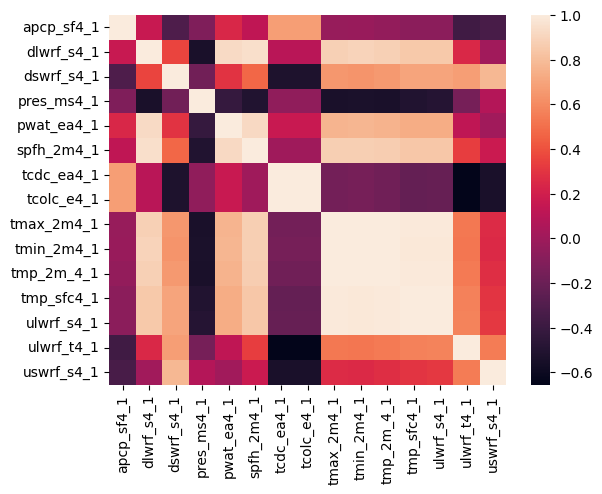

In [60]:
print("La matriz de correlacion 4 es: \n")
print(corr_matrix4)
sea.heatmap(corr_matrix4)

Mostramos Matriz 5:

La matriz de correlacion 5 es: 

            apcp_sf5_1  dlwrf_s5_1  dswrf_s5_1  pres_ms5_1  pwat_ea5_1  \
apcp_sf5_1    1.000000    0.160652   -0.272184   -0.129085    0.239105   
dlwrf_s5_1    0.160652    1.000000    0.468639   -0.584188    0.920072   
dswrf_s5_1   -0.272184    0.468639    1.000000   -0.274781    0.394244   
pres_ms5_1   -0.129085   -0.584188   -0.274781    1.000000   -0.464452   
pwat_ea5_1    0.239105    0.920072    0.394244   -0.464452    1.000000   
spfh_2m5_1    0.104521    0.946249    0.602943   -0.563564    0.902154   
tcdc_ea5_1    0.609717    0.093117   -0.375446   -0.042419    0.180746   
tcolc_e5_1    0.609876    0.093479   -0.375046   -0.042658    0.181062   
tmax_2m5_1   -0.026075    0.891086    0.692278   -0.590202    0.766240   
tmin_2m5_1   -0.012251    0.914267    0.707868   -0.591887    0.795207   
tmp_2m_5_1   -0.010607    0.916514    0.708463   -0.598083    0.798487   
tmp_sfc5_1    0.004747    0.926690    0.709187   -0.592291    0.812553   
ulwrf

<Axes: >

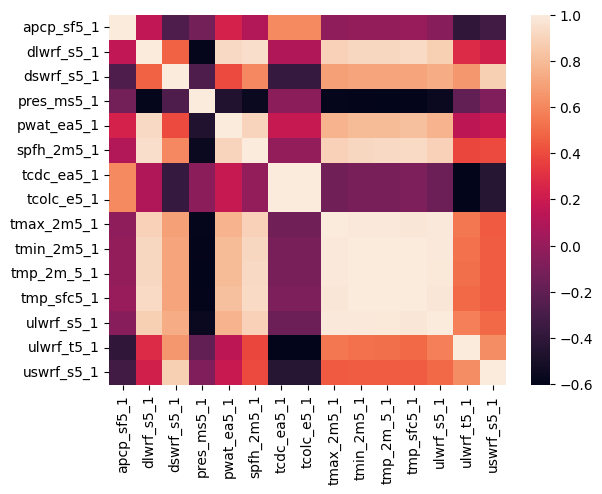

In [61]:
print("La matriz de correlacion 5 es: \n")
print(corr_matrix5)
sea.heatmap(corr_matrix5)

Tras generar y mostrar todas las matrices de correlación, se puede ver que las 5 son prácticamente iguales. Esto se puede interpretar como que, teniendo en cuenta que fueron agrupadadas según las 5 horas del día en las que se tomaron medidas, verdaderamente esto no influye en la correlación entre las distintas variables siendo un sistema que se mantiene estable.

Sin embargo, si nos fijamos de una forma mas específica en las distintas variables y sus correlaciones con cada una de las demás, podemos ver claras diferencias entre ellas. Por ejemplo, la correlación entre las variables "pwat_ea" y "spfh_2m" es de alrededor de 0.90. Esto quiere decir que están altamente correlacionadas una con la otra y un incremento de una, probablemente provocaría un incremento en la otra casi igual de grande (lo mismo ocurriría con un descenso). Al contrario de estas se encuentra el caso de las variables "tmax_2m" y "pres_ms" que tienen una correlación de -0.59. En este caso, un descenso de una provocaría el aumento de la otra y viceversa aunque con un efecto algo más pequeño en comparación con el ejemplo de correlación positiva mencionada anteriormente.

En un punto medio nos encontramos con casos como "tcolc_e" y "dlwrf_s" que tienen una correlación cercana a 0 (0.093117) por lo que es posible considerar que se trata de dos variables independientes una de la otra.

No consideramos necesario hacer una representación gráfica tipo boxplot ya que las matrices mostradas anteriormente ya no sirven para el análisis que se pide permitiendonos conocer un poco mejor el set de datos que se nos proporciona y las relaciones entre las variables.

Ahora que hemos completado el análisis exploratorio de datos, pasamos al punto 4 del enunciado en el que se pide dividir los datos en "train" y "test". Para ello primero debemos separar la salida del resto de columnas. 

Como se pide, separaremos los primeros 10 años para entrenamiento y los 2 últimos para test. Al mismo tiempo debemos dividir esos 10 años en 8 para entrenamiento y 2 para validación.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import cross_val_score

In [63]:
X_df = disp_df.drop('salida', axis=1)
y_df = disp_df['salida']

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=2/12, random_state=21)
X_train_2, X_validation, y_train_2, y_validation = train_test_split(X_train, y_train, test_size=2/10, random_state=21)

# Diccionario para almacenar los resultados
resultados = {}

Ya que se ha pedido que no se haga cross validation mezclando datos presentes y futuros, vamos a usar un PredefinedSplit para usar como "cv" donde se requiera.

In [64]:
# Creamos una lista del tamaño del conjunto de entrenamiento
tamaño = X_train_2.shape[0]
indices = np.zeros(tamaño, dtype=int)

# El conjunto se dividirá en 6 años de entrenamiento y 2 de prueba
train_end_index = 365 * 6

indices[:train_end_index] = -1
indices[train_end_index:] = 0

# Creamos el objeto PredefinedSplit usando los índices de entrenamiento y prueba
pds = PredefinedSplit(indices)

# Creamos otro pds para los que usen X_train
tamaño = X_train.shape[0]
indices = np.zeros(tamaño, dtype=int)

train_end_index = 365 * 8

indices[:train_end_index] = -1
indices[train_end_index:] = 0

pds_full = PredefinedSplit(indices)

Para tener una primera visión de cómo de bueno es un modelo básico con nuestros datos implementamos un Dummy Regressor. Para este sí está permitido utilizar los datos de X_test ya que solo sirve para hacerse una idea de como se comporta el regressor.

In [65]:
# Crear Dummy Regressor
dummy_regr = DummyRegressor(strategy="mean")
np.random.seed(21)

# Entrenamos el modelo con el conjunto de entrenamiento
dummy_regr.fit(X_train, y_train)

# Hacemos predicciones en el conjunto de prueba
y_test_pred = dummy_regr.predict(X_test)

# Evaluamos el modelo usando MAE y RMSE
mae_dummy = mean_absolute_error(y_test, y_test_pred)
mse_dummy = mean_squared_error(y_test, y_test_pred)
rmse_dummy = np.sqrt(mse_dummy)
score = cross_val_score(dummy_regr, X_train, y_train, cv=pds_full)
print("[DUMMY REGRESSOR]: El MAE es: {}".format(mae_dummy))
print("[DUMMY REGRESSOR]: El RMSE es: {}".format(rmse_dummy))
print("[DUMMY REGRESSOR]: El score es: {}".format(score))
resultados["Dummy"] = [mae_dummy, rmse_dummy, score]


[DUMMY REGRESSOR]: El MAE es: 6682629.317305312
[DUMMY REGRESSOR]: El RMSE es: 7829253.654709075
[DUMMY REGRESSOR]: El score es: [-0.00111056]


Una vez hecho, comenzamos a crear y evaluar modelos con los datos disponibles sin ajustar hiperparámetros. El primero de ellos es KNN

In [66]:
# Normalización de los datos
scaler = MinMaxScaler()
X_train_norm_2 = scaler.fit_transform(X_train_2)
X_validation_norm = scaler.transform(X_validation)

# Crear KNN model
knn_regr = KNeighborsRegressor()
np.random.seed(21)

# Entrenamos el modelo con el conjunto de entrenamiento y medimos el tiempo que tarda
start = time.time()

knn_regr.fit(X_train_norm_2, y_train_2)

end = time.time()
tiempo_knn = end - start
print("TIEMPO: ", tiempo_knn)

# Hacemos predicciones en el conjunto de prueba
y_test_pred = knn_regr.predict(X_validation_norm)

# Evaluamos el modelo usando MAE y RMSE
mae_knn= mean_absolute_error(y_validation, y_test_pred)
mse_knn= mean_squared_error(y_validation, y_test_pred)
rmse_knn= np.sqrt(mse_knn)
score = cross_val_score(knn_regr, X_train_2, y_train_2, cv=pds)
print("[KNN]: El MAE es: {}".format(mae_knn))
print("[KNN]: El RMSE es: {}".format(rmse_knn))
print("[KNN]: El score es: {}".format(score))
resultados["KNN"] = [mae_knn, rmse_knn, tiempo_knn, score]

TIEMPO:  0.003628969192504883
[KNN]: El MAE es: 2668303.808219178
[KNN]: El RMSE es: 3852690.2513246946
[KNN]: El score es: [0.73439901]


El segundo es mediante un Árbol de Regresión.

In [67]:
# Crear Decision Tree Regressor
arbol_regr = DecisionTreeRegressor()
# Semilla para poder reproducir los resultados
np.random.seed(21)

# Entrenamos el modelo con el conjunto de entrenamiento y medimos el tiempo que tarda
start = time.time()

arbol_regr.fit(X_train_2, y_train_2)

end = time.time()
tiempo_tree = end - start
print("TIEMPO: ", tiempo_tree)

# Hacemos predicciones en el conjunto de prueba
y_test_pred = arbol_regr.predict(X_validation)

# Evaluamos el modelo usando MAE y RMSE
mae_tree= mean_absolute_error(y_validation, y_test_pred)
mse_tree= mean_squared_error(y_validation, y_test_pred)
rmse_tree= np.sqrt(mse_tree)
score = cross_val_score(arbol_regr, X_train_2, y_train_2, cv=pds)
print("[ÁRBOL DE REGRESIÓN]: El MAE es: {}".format(mae_tree))
print("[ÁRBOL DE REGRESIÓN]: El RMSE es: {}".format(rmse_tree))
print("[ÁRBOL DE REGRESIÓN]: El score es: {}".format(score))
resultados["Árbol de Regresión"] = [mae_tree, rmse_tree, tiempo_tree, score]

TIEMPO:  0.35450267791748047
[ÁRBOL DE REGRESIÓN]: El MAE es: 3293961.0410958906
[ÁRBOL DE REGRESIÓN]: El RMSE es: 4859960.42621128
[ÁRBOL DE REGRESIÓN]: El score es: [0.63736441]


El tercer modelo es la Regresión Lineal

In [68]:
# Creamos Linear Regression
linear_regr = LinearRegression()

# Semilla para poder reproducir los resultados
np.random.seed(21)

# Entrenamos el modelo con el conjunto de entrenamiento y medimos el tiempo que tarda
start = time.time()

linear_regr.fit(X_train_2, y_train_2)

end = time.time()
tiempo_linear = end - start
print("TIEMPO: ", tiempo_linear)

# Hacemos predicciones en el conjunto de prueba 
y_test_pred = linear_regr.predict(X_validation)

# Evaluamos el modelo usando MAE y RMSE
mae_linear = mean_absolute_error(y_validation, y_test_pred)
mse_linear = mean_squared_error(y_validation, y_test_pred)
rmse_linear = np.sqrt(mse_linear)
score = cross_val_score(linear_regr, X_train_2, y_train_2, cv=pds)
print("[REGRESIÓN LINEAL]: El MAE es: {}".format(mae_linear))
print("[REGRESIÓN LINEAL]: El RMSE es: {}".format(rmse_linear))
print("[REGRESIÓN LINEAL]: El score es: {}".format(score))
resultados["Regresión Lineal"] = [mae_linear, rmse_linear, tiempo_linear, score]

TIEMPO:  0.06581735610961914
[REGRESIÓN LINEAL]: El MAE es: 2510056.9122926663
[REGRESIÓN LINEAL]: El RMSE es: 3478654.055395637
[REGRESIÓN LINEAL]: El score es: [0.83089383]


Ahora que hemos creado todos los modelos sin ajuste de parámetros, vamos a imprimir todos los valores obtenidos para poder analizarlos.

In [69]:
# DUMMY REGRESSOR
print("[DUMMY REGRESSOR]: El MAE es: {}".format(resultados["Dummy"][0]))
print("[DUMMY REGRESSOR]: El RMSE es: {}".format(resultados["Dummy"][1]))
print("[DUMMY REGRESSOR]: El score es: {}".format(resultados["Dummy"][2]))
print("---------------------------------------------------------------")
# KNN
print("TIEMPO: ", resultados["KNN"][2])
print("[KNN]: El MAE es: {}".format(resultados["KNN"][0]))
print("[KNN]: El RMSE es: {}".format(resultados["KNN"][1]))
print("[KNN]: El score es: {}".format(resultados["KNN"][3]))
print("---------------------------------------------------------------")
# ÁRBOL DE REGRESIÓN
print("TIEMPO: ", resultados["Árbol de Regresión"][2])
print("[ÁRBOL DE REGRESIÓN]: El MAE es: {}".format(resultados["Árbol de Regresión"][0]))
print("[ÁRBOL DE REGRESIÓN]: El RMSE es: {}".format(resultados["Árbol de Regresión"][1]))
print("[ÁRBOL DE REGRESIÓN]: El score es: {}".format(resultados["Árbol de Regresión"][3]))
print("---------------------------------------------------------------")
# REGRESIÓN LINEAL
print("TIEMPO: ", resultados["Regresión Lineal"][2])
print("[REGRESIÓN LINEAL]: El MAE es: {}".format(resultados["Regresión Lineal"][0]))
print("[REGRESIÓN LINEAL]: El RMSE es: {}".format(resultados["Regresión Lineal"][1]))
print("[REGRESIÓN LINEAL]: El score es: {}".format(resultados["Regresión Lineal"][3]))

[DUMMY REGRESSOR]: El MAE es: 6682629.317305312
[DUMMY REGRESSOR]: El RMSE es: 7829253.654709075
[DUMMY REGRESSOR]: El score es: [-0.00111056]
---------------------------------------------------------------
TIEMPO:  0.003628969192504883
[KNN]: El MAE es: 2668303.808219178
[KNN]: El RMSE es: 3852690.2513246946
[KNN]: El score es: [0.73439901]
---------------------------------------------------------------
TIEMPO:  0.35450267791748047
[ÁRBOL DE REGRESIÓN]: El MAE es: 3293961.0410958906
[ÁRBOL DE REGRESIÓN]: El RMSE es: 4859960.42621128
[ÁRBOL DE REGRESIÓN]: El score es: [0.63736441]
---------------------------------------------------------------
TIEMPO:  0.06581735610961914
[REGRESIÓN LINEAL]: El MAE es: 2510056.9122926663
[REGRESIÓN LINEAL]: El RMSE es: 3478654.055395637
[REGRESIÓN LINEAL]: El score es: [0.83089383]


Echando un vistazo a los resultados obtenidos podemos ver que los 3 modelos desarrollados son mejores que el Dummy Regressor ya que cuentan con valores considerablemente más bajos que este segundo de MAE y RSME. Al mismo tiempo, es score es mucho mejor en todos ellos comparados con este.

Ahora debemos ajustar los parámetros de los modelos para intentar mejorarlos. Comenzamos de nuevo con KNN.

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [71]:
# List of the two spaces
param_grid = {
    'n_neighbors': range(1, 30, 5),
    'p': (1, 2),
    'leaf_size': range(1, 30, 10),
    'weights': ['uniform', 'distance']
}

# Normalización de los datos
scaler = MinMaxScaler()
X_train_norm_2 = scaler.fit_transform(X_train_2)
X_validation_norm = scaler.transform(X_validation)

# Crear KNN model
knn_regr = KNeighborsRegressor()
np.random.seed(21)

grid_search = GridSearchCV(estimator = knn_regr,param_grid = param_grid, cv = pds, scoring = 'neg_mean_squared_error')

# Entrenamos el modelo con el conjunto de entrenamiento y medimos el tiempo que tarda
grid_search.fit(X_train_norm_2, y_train_2)

# Creamos nuevo modelo con los mejores parámetros
knn_regr = KNeighborsRegressor(**grid_search.best_params_)

start = time.time()

knn_regr.fit(X_train_norm_2, y_train_2)

end = time.time()
tiempo_knn = end - start

# Hacemos predicciones en el conjunto de prueba
y_test_pred = knn_regr.predict(X_validation_norm)

# Evaluamos el modelo usando MAE y RMSE
mae_knn= mean_absolute_error(y_validation, y_test_pred)
mse_knn= mean_squared_error(y_validation, y_test_pred)
rmse_knn= np.sqrt(mse_knn)
score = cross_val_score(knn_regr, X_train_2, y_train_2, cv=pds)
resultados["KNN Modificado"] = [mae_knn, rmse_knn, tiempo_knn, score]

In [72]:
print("[KNN VIEJO]: TIEMPO: ", resultados["KNN"][2])
print("[KNN MODIFICADO]: TIEMPO: ", resultados["KNN Modificado"][2])

print("\n[KNN VIEJO]: El MAE es: {}".format(resultados["KNN"][0]))
print("[KNN MODIFICADO]: El MAE es: {}".format(resultados["KNN Modificado"][0]))

print("\n[KNN VIEJO]: El RMSE es: {}".format(resultados["KNN"][1]))
print("[KNN MODIFICADO]: El RMSE es: {}".format(resultados["KNN Modificado"][1]))

print("\n[KNN VIEJO]: El score es: {}".format(resultados["KNN"][3]))
print("[KNN MODIFICADO]: El score es: {}".format(resultados["KNN Modificado"][3]))

print("\n-----------------------------Valores óptimos de los hiperparámetros conseguidos-----------------------------------")
grid_search.best_params_, -grid_search.best_score_

[KNN VIEJO]: TIEMPO:  0.003628969192504883
[KNN MODIFICADO]: TIEMPO:  0.0010006427764892578

[KNN VIEJO]: El MAE es: 2668303.808219178
[KNN MODIFICADO]: El MAE es: 2607728.358023526

[KNN VIEJO]: El RMSE es: 3852690.2513246946
[KNN MODIFICADO]: El RMSE es: 3681062.766322009

[KNN VIEJO]: El score es: [0.73439901]
[KNN MODIFICADO]: El score es: [0.7763778]

-----------------------------Valores óptimos de los hiperparámetros conseguidos-----------------------------------


({'leaf_size': 1, 'n_neighbors': 21, 'p': 1, 'weights': 'distance'},
 11825582327258.795)

Tras la optimización de parámetros del KNN, vemos que los resultados obtenidos son mejores gracias a la alteración de algunos cambios en los que venían por defecto como el "leaf_size" que ha cambiado a 1, "n_neighbors" que se ha asentado en 21, "p" que ahora es 1 y "weights" que pasa de "uniform" a "distance.

Ahora con el Árbol de Regresión.

In [73]:
# Crear Decision Tree Regressor
arbol_regr = DecisionTreeRegressor()
# Semilla para poder reproducir los resultados
np.random.seed(21)

# Creamos un diccionario con los parámetros que vamos a utilizar en la comprobación
param_grid = {
    'criterion': ['squared_error', 'friedman_mse'],
    'max_depth': range(2, 10, 2),
    'min_samples_split': range(2, 82, 16)
}

# Creamos el objeto GridSearchCV
grid_search = GridSearchCV(estimator = arbol_regr, param_grid = param_grid, cv = pds, scoring = 'neg_mean_squared_error')

# Entrenamos el modelo con el conjunto de entrenamiento y medimos el tiempo que tarda
grid_search.fit(X_train_2, y_train_2)

# Creamos nuevo modelo con los mejores parámetros
tree_regr = DecisionTreeRegressor(**grid_search.best_params_)

start = time.time()

tree_regr.fit(X_train_2, y_train_2)

end = time.time()
tiempo_tree = end - start

# Hacemos predicciones en el conjunto de prueba 
y_test_pred = tree_regr.predict(X_validation)

# Evaluamos el modelo usando MAE y RMSE
mae_tree= mean_absolute_error(y_validation, y_test_pred)
mse_tree= mean_squared_error(y_validation, y_test_pred)
rmse_tree= np.sqrt(mse_tree)
score = cross_val_score(tree_regr, X_train_2, y_train_2, cv=pds)
resultados["Árbol de Regresión Modificado"] = [mae_tree, rmse_tree, tiempo_tree, score]

In [74]:
print("[ÁRBOL DE REGRESIÓN VIEJO]: TIEMPO:", resultados["Árbol de Regresión"][2])
print("[ÁRBOL DE REGRESIÓN MODIFICADO]: TIEMPO: ", resultados["Árbol de Regresión Modificado"][2])

print("\n[ÁRBOL DE REGRESIÓN VIEJO]: El MAE es: {}".format(resultados["Árbol de Regresión"][0]))
print("[ÁRBOL DE REGRESIÓN MODIFICADO]: El MAE es: {}".format(resultados["Árbol de Regresión Modificado"][0]))

print("\n[ÁRBOL DE REGRESIÓN VIEJO]: El RMSE es: {}".format(resultados["Árbol de Regresión"][1]))
print("[ÁRBOL DE REGRESIÓN MODIFICADO]: El RMSE es: {}".format(resultados["Árbol de Regresión Modificado"][1]))

print("\n[ÁRBOL DE REGRESIÓN VIEJO]: El score es: {}".format(resultados["Árbol de Regresión"][3]))
print("[ÁRBOL DE REGRESIÓN MODIFICADO]: El score es: {}".format(resultados["Árbol de Regresión Modificado"][3]))

print("\n-----------------------------Valores óptimos de los hiperparámetros conseguidos-----------------------------------")
grid_search.best_params_, -grid_search.best_score_

[ÁRBOL DE REGRESIÓN VIEJO]: TIEMPO: 0.35450267791748047
[ÁRBOL DE REGRESIÓN MODIFICADO]: TIEMPO:  0.12790417671203613

[ÁRBOL DE REGRESIÓN VIEJO]: El MAE es: 3293961.0410958906
[ÁRBOL DE REGRESIÓN MODIFICADO]: El MAE es: 2793832.0623495835

[ÁRBOL DE REGRESIÓN VIEJO]: El RMSE es: 4859960.42621128
[ÁRBOL DE REGRESIÓN MODIFICADO]: El RMSE es: 4006228.0623056577

[ÁRBOL DE REGRESIÓN VIEJO]: El score es: [0.63736441]
[ÁRBOL DE REGRESIÓN MODIFICADO]: El score es: [0.76244171]

-----------------------------Valores óptimos de los hiperparámetros conseguidos-----------------------------------


({'criterion': 'squared_error', 'max_depth': 6, 'min_samples_split': 50},
 14858313401074.723)

Podemos ver mejoras en ambas medidas (MAE y RMSE) gracias a una máxima profundidad de 6 y un mínimo de 66 para separar un nodo interno. El criterio de evaluación se ha mantenido por defecto (squared_error).

Por último ajustamos el modelo de Regresión Lineal

In [75]:
# Creamos Linear Regression
linear_regr = LinearRegression()

# Semilla para poder reproducir los resultados
np.random.seed(21)

param_grid = {
    'positive': [True, False],
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Creamos el objeto GridSearchCV
grid_search = GridSearchCV(estimator = linear_regr, param_grid = param_grid, cv = pds, scoring = 'neg_mean_squared_error')

# Entrenamos el modelo con el conjunto de entrenamiento y medimos el tiempo que tarda
grid_search.fit(X_train_2, y_train_2)

# Creamos nuevo modelo con los mejores parámetros
linear_regr = LinearRegression(**grid_search.best_params_)

start = time.time()

linear_regr.fit(X_train_2, y_train_2)

end = time.time()
tiempo_linear = end - start

# Hacemos predicciones en el conjunto de prueba 
y_test_pred = linear_regr.predict(X_validation)

# Evaluamos el modelo usando MAE y RMSE
mae_linear = mean_absolute_error(y_validation, y_test_pred)
mse_linear = mean_squared_error(y_validation, y_test_pred)
rmse_linear = np.sqrt(mse_linear)
score = cross_val_score(tree_regr, X_train_2, y_train_2, cv=pds)
resultados["Regresión Lineal Modificado"] = [mae_linear, rmse_linear, tiempo_linear, score]


In [76]:
print("[REGRESIÓN LINEAL VIEJO]: TIEMPO: ", resultados["Regresión Lineal Modificado"][2])
print("[REGRESIÓN LINEAL MODIFICADO]: TIEMPO: ", resultados["Regresión Lineal Modificado"][2])

print("\n[REGRESIÓN LINEAL VIEJO]: El MAE es: {}".format(resultados["Regresión Lineal"][0]))
print("[REGRESIÓN LINEAL MODIFICADO]: El MAE es: {}".format(resultados["Regresión Lineal Modificado"][0]))

print("\n[REGRESIÓN LINEAL VIEJO]: El RMSE es: {}".format(resultados["Regresión Lineal"][1]))
print("[REGRESIÓN LINEAL MODIFICADO]: El RMSE es: {}".format(resultados["Regresión Lineal Modificado"][1]))

print("\n[REGRESIÓN LINEAL VIEJO]: El score es: {}".format(resultados["Regresión Lineal"][3]))
print("[REGRESIÓN LINEAL MODIFICADO]: El score es: {}".format(resultados["Regresión Lineal Modificado"][3]))

print("\n-----------------------------Valores óptimos de los hiperparámetros conseguidos-----------------------------------")
grid_search.best_params_, -grid_search.best_score_

[REGRESIÓN LINEAL VIEJO]: TIEMPO:  0.029970407485961914
[REGRESIÓN LINEAL MODIFICADO]: TIEMPO:  0.029970407485961914

[REGRESIÓN LINEAL VIEJO]: El MAE es: 2510056.9122926663
[REGRESIÓN LINEAL MODIFICADO]: El MAE es: 2508531.8528142124

[REGRESIÓN LINEAL VIEJO]: El RMSE es: 3478654.055395637
[REGRESIÓN LINEAL MODIFICADO]: El RMSE es: 3480428.695809931

[REGRESIÓN LINEAL VIEJO]: El score es: [0.83089383]
[REGRESIÓN LINEAL MODIFICADO]: El score es: [0.76244171]

-----------------------------Valores óptimos de los hiperparámetros conseguidos-----------------------------------


({'copy_X': True, 'fit_intercept': False, 'positive': False},
 10720634471372.705)

Como podemos ver, este modelo ya era óptimo de por sí, ya que a pesar de que GridSearch ha cambiado uno de los hiperparámetros que venían por defecto, este ha dado peores resultados que el original.

Ahora imprimimos todos los valores nuevos juntos.

In [77]:
# KNN
print("[KNN MODIFICADO]: TIEMPO: ", resultados["KNN Modificado"][2])
print("[KNN MODIFICADO]: El MAE es: {}".format(resultados["KNN Modificado"][0]))
print("[KNN MODIFICADO]: El RMSE es: {}".format(resultados["KNN Modificado"][1]))
print("[KNN MODIFICADO]: El score es: {}".format(resultados["KNN Modificado"][3]))
print("---------------------------------------------------------------")
# ÁRBOL DE REGRESIÓN
print("[ÁRBOL DE REGRESIÓN MODIFICADO]: TIEMPO: ", resultados["Árbol de Regresión Modificado"][2])
print("[ÁRBOL DE REGRESIÓN MODIFICADO]: El MAE es: {}".format(resultados["Árbol de Regresión Modificado"][0]))
print("[ÁRBOL DE REGRESIÓN MODIFICADO]: El RMSE es: {}".format(resultados["Árbol de Regresión Modificado"][1]))
print("[ÁRBOL DE REGRESIÓN MODIFICADO]: El score es: {}".format(resultados["Árbol de Regresión Modificado"][3]))
print("---------------------------------------------------------------")
# REGRESIÓN LINEAL
print("[REGRESIÓN LINEAL VIEJO]: TIEMPO: ", resultados["Regresión Lineal Modificado"][2])
print("[REGRESIÓN LINEAL VIEJO]: El MAE es: {}".format(resultados["Regresión Lineal"][0]))
print("[REGRESIÓN LINEAL VIEJO]: El RMSE es: {}".format(resultados["Regresión Lineal"][1]))
print("[REGRESIÓN LINEAL VIEJO]: El score es: {}".format(resultados["Regresión Lineal"][3]))

[KNN MODIFICADO]: TIEMPO:  0.0010006427764892578
[KNN MODIFICADO]: El MAE es: 2607728.358023526
[KNN MODIFICADO]: El RMSE es: 3681062.766322009
[KNN MODIFICADO]: El score es: [0.7763778]
---------------------------------------------------------------
[ÁRBOL DE REGRESIÓN MODIFICADO]: TIEMPO:  0.12790417671203613
[ÁRBOL DE REGRESIÓN MODIFICADO]: El MAE es: 2793832.0623495835
[ÁRBOL DE REGRESIÓN MODIFICADO]: El RMSE es: 4006228.0623056577
[ÁRBOL DE REGRESIÓN MODIFICADO]: El score es: [0.76244171]
---------------------------------------------------------------
[REGRESIÓN LINEAL VIEJO]: TIEMPO:  0.029970407485961914
[REGRESIÓN LINEAL VIEJO]: El MAE es: 2510056.9122926663
[REGRESIÓN LINEAL VIEJO]: El RMSE es: 3478654.055395637
[REGRESIÓN LINEAL VIEJO]: El score es: [0.83089383]


Realizada la optimización de los hiperparámetros de los distintos modelos, hemos llegado a una serie de conclusiones:

- El mejor método es el de Regresión Lineal ya que los valores de las métricas de evaluación RMSE y MAE son menores respecto a los otros modelos y el score es mayor.

- Si nos fijamos en el tiempo que tarda cada uno está claro que el KNN es el caso más rápido con una diferencia muy grande en comparación al árbol de regresión. Sin embargo, el Árbol de Regresión es el único que ha cambiado su tiempo de entrenamiento y no solo ha cambiado sino que ha disminuido notablemente a pesar de que siga siendo el más lento con diferencia. Parece ser que en este método, los hiperparámetros que se escojan juegan un papel muy crucial en el tiempo que se necesitará.

- Si bien todos los valores eran en un inicio bastante mejores que los obtenidos con el Dummy Regressor implementado como punto de partida, podemos ver también mejoras en el caso del KNN y el Árbol de Regresión tras la optimización de parámetros gracias a que el GridSearch consiguió encontrar algunos cambios que podíamos realizar para generar un modelo mejor distinto al que se generaba por defecto. Sin embargo, si nos fijamos en el que hemos seleccionado como mejor método por ser el más óptimo en cuanto a valores de MAE y RMSE, nos encontramos con que los hiperparámetros que la librería usa por defecto son ya los óptimos algo que ha provocado que no se haya producido ningún cambio en este. Esto no tiene que ser necesariamente malo sino que solo indica que nuestro mejor caso ya estaba siendo utilizado.

- Como mencionado anteriormente, salvo en el de Regresión Lineal, todos los métodos han conseguido encontrar un set de hiperparámetros más ideal que el que venía por defecto.

Ahora se pide que disminuyamos la dimensionalidad del problema. Para ello usaremos un Pipeline con un selector.

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import KFold

Primero vamos a usar Gridsearch para obtener el número de atributos óptimos del modelo. 

Lo ideal sería hacerlo con el conjunto X_train. Sin embargo, esto nos obligaría a usar X_test lo cual no está permitido. Por ello, usaremos el conjunto más reducido como hemos estado usando para los modelos con el riesgo de que se eliminen más atributos de los deseados.

In [79]:
# Creamos el selector, scaler y el modelo
selector = SelectKBest(f_regression)
scaler = StandardScaler()
knn_regr = KNeighborsRegressor()

# Creamos el pipeline
pipe_regr = Pipeline([
  ('scale', scaler),
  ('select', selector),
  ('knn', knn_regr)                     
])

# Creamos el grid de parámetros
param_grid = {'select__k': list(range(1,75))}

# Creamos el objeto GridSearchCV
opt_atr = GridSearchCV(pipe_regr, param_grid, scoring="neg_mean_squared_error", cv=pds)
                               
# Entrenamos el modelo y mostramos el número de features seleccionadas como óptimas   
opt_atr.fit(X_train_norm_2, y_train_2)
opt_atr.best_params_

{'select__k': 44}

Conocidos el número óptimo de atributos, obtenemos los 44 atributos más importantes y su respectivo número de columna en los datos

In [80]:
# Se eligen los 44 mejores atributos
selector = SelectKBest(f_regression, k=44)
scaler = StandardScaler()
knn_regr = KNeighborsRegressor()

# Creamos el pipeline
pipe_regr = Pipeline([
  ('scale', scaler),
  ('select', selector),
  ('knn', knn_regr)                     
])

#Entrenamos el modelo y se muestran los resultados
pipe_regr.fit(X_train_norm_2,y_train_2)

Pipeline(steps=[('scale', StandardScaler()),
                ('select',
                 SelectKBest(k=44,
                             score_func=<function f_regression at 0x000001EB64CF1430>)),
                ('knn', KNeighborsRegressor())])

In [81]:
# Imprime si el atributo ha sido seleccionado o no con True o False
print("Atributos seleccionados:")
print(pipe_regr.named_steps['select'].get_support())
print("----------------------------------------------------------------------------------")

# Posición atributos
print("Posición de los atributos en la tabla")
print(np.where(pipe_regr.named_steps['select'].get_support()))
print("----------------------------------------------------------------------------------")

# Nombres atributos
print("Los nombres de los atributos son:")
atr = selector.get_support()
nombres_atributos = np.array(list(X_train.columns))[atr].tolist()
print(nombres_atributos)


Atributos seleccionados:
[False False False False False False False False False False False  True
  True  True  True False False False False False False False False False
 False False  True  True  True  True False False  True False False False
 False  True False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True]
----------------------------------------------------------------------------------
Posición de los atributos en la tabla
(array([11, 12, 13, 14, 26, 27, 28, 29, 32, 37, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 71, 72, 73, 74], dtype=int64),)
----------------------------------------------------------------------------------
Los nombres de los atributos son:
['dswrf_s2_1', 'dswrf_s3_1', 'dswrf_s4_1', 'dswrf_s5_1', 'spfh_2m

Como podemos ver, se seleccionan los 44 atributos que son significantes para el modelo. Ahora mostramos en un gráfico el MSE de cada variable.

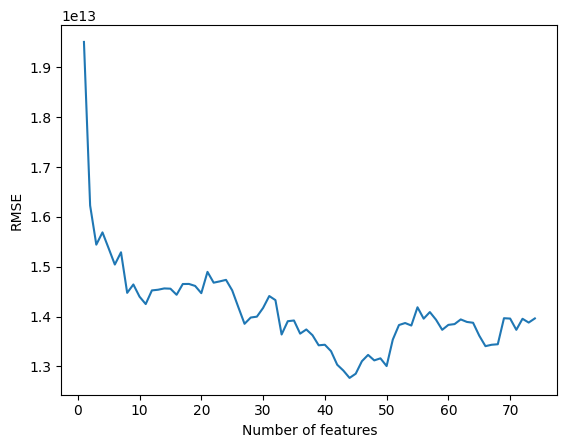

In [82]:
plt.plot(opt_atr.cv_results_['param_select__k'].data, -opt_atr.cv_results_['mean_test_score'])
plt.ylabel('RMSE')
plt.xlabel('Number of features')
plt.show()

Por último valoramos el nuevo modelo

In [83]:
from sklearn.metrics import mean_squared_error

predictions_test = pipe_regr.predict(X_validation_norm)
mae_result = mean_absolute_error(y_validation, predictions_test)
mse_result = mean_squared_error(y_validation, predictions_test)
rmse_result = np.sqrt(mse_result)
score_result = cross_val_score(pipe_regr, X_train_norm_2, y_train_2, cv=pds)
print("[MAE resultado de la evaluación]: {}".format(mae_result))
print("[RMSE resultado de la evaluación]: {}".format(rmse_result))
print("[Score resultado de la evaluación]: {}".format(score_result))

[MAE resultado de la evaluación]: 2763924.5424657534
[RMSE resultado de la evaluación]: 3954718.9288574685
[Score resultado de la evaluación]: [0.7990165]


Hemos realizado una reducción del número de atributos para disminuir la dimensionalidad del problema a través del método HPO y se han conseguido mejorar los resultados teniendo en cuenta el score por lo que sí es posible disminuir la dimensionalidad del problema incluso mejorando resultados.

Ahora utilizaremos métodos avanzados para nuestro modelo y seguiremos el mismo proceso que con los 3 anteriores.

El primero es SVM para el cual debemos importar SVR (ya que estamos tratando con un problema de regresión)

In [84]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

Se evalúa el modelo SVM con sus hiperparámetros por omisión

In [85]:
# Creamos el SVR
svm_regr = SVR()

np.random.seed(21)

# Entrenamos el modelo y medimos el tiempo
start = time.time()

svm_regr.fit(X_train_2, y_train_2)

end = time.time()
tiempo_svm = end - start

# Hacemos las predicciones
y_test_pred = svm_regr.predict(X_validation)

# Calculamos los errores
mae_svm = mean_absolute_error(y_validation, y_test_pred)
mse_svm = mean_squared_error(y_validation, y_test_pred)
rmse_svm = np.sqrt(mse_svm)
score = cross_val_score(svm_regr, X_train_2, y_train_2, cv=pds)
resultados["SVM"] = [mae_svm, rmse_svm, tiempo_svm, score]

# Imprimimos los resultados
print("TIEMPO: ", resultados["SVM"][2])
print("[SVM]: El MAE es: {}".format(resultados["SVM"][0]))
print("[SVM]: El RMSE es: {}".format(resultados["SVM"][1]))
print("[SVM]: El score es: {}".format(resultados["SVM"][3]))

TIEMPO:  1.1499919891357422
[SVM]: El MAE es: 6442580.937318777
[SVM]: El RMSE es: 7638961.131134311
[SVM]: El score es: [-0.00600222]


Se realiza el ajuste de hiperparámetros para su optimización

In [86]:
# Creamos el SVR
svm_regr = SVR()

# Parámetros a probar
param_grid = {'C': [0.1, 10, 100],
              'gamma': [0.01, 0.1],
              'kernel': ['rbf','linear']
              } 

# Creamos el GridSearchCV
grid_search = GridSearchCV(estimator = svm_regr, param_grid = param_grid, cv = pds, scoring = 'neg_mean_squared_error', n_jobs = -1)

# Entrenamos el modelo
np.random.seed(21)
grid_search.fit(X_train_2, y_train_2)

grid_search.best_params_, grid_search.best_score_

({'C': 10, 'gamma': 0.01, 'kernel': 'linear'}, -11834209491881.617)

Tras encontrar los mejores valores para los parámetros, creamos un nuevo modelo con estos valores y medimos de nuevo las métricas evaluables

In [87]:
# Creamos nuevo modelo con los mejores parámetros
svm_regr = SVR(**grid_search.best_params_)

# Entrenamos el modelo y medimos el tiempo
start = time.time()

svm_regr.fit(X_train_2, y_train_2)

end = time.time()
tiempo_svm = end - start

# Hacemos las predicciones
y_test_pred = svm_regr.predict(X_validation)

# Calculamos los errores
mae_svm = mean_absolute_error(y_validation, y_test_pred)
mse_svm = mean_squared_error(y_validation, y_test_pred)
rmse_svm = np.sqrt(mse_svm)
score = cross_val_score(svm_regr, X_train_2, y_train_2, cv=pds)
resultados["SVM Modificado"] = [mae_svm, rmse_svm, tiempo_svm, score]

# Imprimimos los resultados
print("TIEMPO: {}".format(resultados['SVM Modificado'][2]))
print("[SVM MODIFICADO]: El MAE es: {}".format(resultados['SVM Modificado'][0]))
print("[SVM MODIFICADO]: El RSME es: {}".format(resultados['SVM Modificado'][1]))
print("[SVM MODIFICADO]: El score es: {}".format(resultados['SVM Modificado'][3]))

TIEMPO: 1.482239007949829
[SVM MODIFICADO]: El MAE es: 2418841.9204970575
[SVM MODIFICADO]: El RSME es: 3685903.29729186
[SVM MODIFICADO]: El score es: [0.8137497]


In [88]:
# SVM
print("TIEMPO SVM: ", resultados["SVM"][2])
print("[SVM]: El MAE es: {}".format(resultados["SVM"][0]))
print("[SVM]: El RMSE es: {}".format(resultados["SVM"][1]))
print("[SVM]: El score es: {}".format(resultados["SVM"][3]))
print("---------------------------------------------------------------")
# SVM Modificado
print("TIEMPO SVM MODIFICADO: ", resultados["SVM Modificado"][2])
print("[SVM MODIFICADO]: El MAE es: {}".format(resultados["SVM Modificado"][0]))
print("[SVM MODIFICADO]: El RMSE es: {}".format(resultados["SVM Modificado"][1]))
print("[SVM MODIFICADO]: El score es: {}".format(resultados["SVM Modificado"][3]))

TIEMPO SVM:  1.1499919891357422
[SVM]: El MAE es: 6442580.937318777
[SVM]: El RMSE es: 7638961.131134311
[SVM]: El score es: [-0.00600222]
---------------------------------------------------------------
TIEMPO SVM MODIFICADO:  1.482239007949829
[SVM MODIFICADO]: El MAE es: 2418841.9204970575
[SVM MODIFICADO]: El RMSE es: 3685903.29729186
[SVM MODIFICADO]: El score es: [0.8137497]


Ahora evaluamos con el método del Random Forest con los hiperparámetros por omisión

In [89]:
# Creamos el RandomForest
randFor_regr = RandomForestRegressor()
np.random.seed(21)

# Entrenamos el modelo y medimos el tiempo
start = time.time()

randFor_regr.fit(X_train_2, y_train_2)

end = time.time()
tiempo_randFor = end - start

# Hacemos las predicciones
y_test_pred = randFor_regr.predict(X_validation)

# Calculamos los errores
mae_randFor = mean_absolute_error(y_validation, y_test_pred)
mse_randFor = mean_squared_error(y_validation, y_test_pred)
rmse_randFor = np.sqrt(mse_randFor)
score = cross_val_score(randFor_regr, X_train_2, y_train_2, cv=pds)
resultados["Random Forest"] = [mae_randFor, rmse_randFor, tiempo_randFor, score]

# Imprimimos los resultados
print("TIEMPO: ", resultados["Random Forest"][2])
print("[Random Forest]: El MAE es: {}".format(resultados["Random Forest"][0]))
print("[Random Forest]: El RMSE es: {}".format(resultados["Random Forest"][1]))
print("[Random Forest]: El score es: {}".format(resultados["Random Forest"][3]))


TIEMPO:  30.201228380203247
[Random Forest]: El MAE es: 2475975.4808219178
[Random Forest]: El RMSE es: 3473614.2220459227
[Random Forest]: El score es: [0.81611984]


A continuación encontramos los mejores hiperparámetros.

In [90]:
# NOTA: Para reducir el tiempo de espera, se han comentado los parámetros que se probaron en el GridSearchCV a excepción de los que resultaron ser los óptimos
# Creamos el RandomForest
randFor_regr = RandomForestRegressor()
np.random.seed(21)

# Parámetros a probar
param_grid = {
            'max_depth': [95],
            #'max_depth': [25, 95],
            'min_samples_leaf': [6],
            #'min_samples_leaf': [1, 6],
            'min_samples_split': [2],
            #'min_samples_split': [2, 12],
            'n_estimators': [200]
            #'n_estimators': [100, 200]
            }

# Creamos el GridSearchCV
grid_search = GridSearchCV(estimator = randFor_regr, param_grid = param_grid, cv = pds, scoring = 'neg_mean_squared_error', n_jobs = -1)

# Entrenamos el modelo
np.random.seed(21)
grid_search.fit(X_train_2, y_train_2)

grid_search.best_params_, grid_search.best_score_

({'max_depth': 95,
  'min_samples_leaf': 6,
  'min_samples_split': 2,
  'n_estimators': 200},
 -11537087528941.299)

Tras encontrar los mejores valores para los parámetros, creamos un nuevo modelo con estos valores y medimos de nuevo las métricas evaluables

In [91]:
# Creamos nuevo modelo con los mejores parámetros
randFor_regr = RandomForestRegressor(**grid_search.best_params_)

# Entrenamos el modelo y medimos el tiempo
start = time.time()

randFor_regr.fit(X_train_2, y_train_2)

end = time.time()
tiempo_randFor = end - start

# Hacemos las predicciones
y_test_pred = randFor_regr.predict(X_validation)

# Calculamos los errores
mae_randFor = mean_absolute_error(y_validation, y_test_pred)
mse_randFor = mean_squared_error(y_validation, y_test_pred)
rmse_randFor = np.sqrt(mse_randFor)
score = cross_val_score(randFor_regr, X_train_2, y_train_2, cv=pds)
resultados["Random Forest Modificado"] = [mae_randFor, rmse_randFor, tiempo_randFor, score]

# Imprimimos los resultados
print("TIEMPO: {}".format(resultados['Random Forest Modificado'][2]))
print("[RANDOM FOREST MODIFICADO]: El MAE es: {}".format(resultados['Random Forest Modificado'][0]))
print("[RANDOM FOREST MODIFICADO]: El RSME es: {}".format(resultados['Random Forest Modificado'][1]))
print("[RANDOM FOREST MODIFICADO]: El score es: {}".format(resultados['Random Forest Modificado'][3]))

TIEMPO: 34.878509283065796
[RANDOM FOREST MODIFICADO]: El MAE es: 2436817.7520805984
[RANDOM FOREST MODIFICADO]: El RSME es: 3458432.014714191
[RANDOM FOREST MODIFICADO]: El score es: [0.81924002]


A continuación mostramos la importancia de cada atributo en ambos modelos:

In [92]:
print("Importancia de las variables [SVM]:")
relevancia = np.abs(svm_regr.coef_[0])
indices = np.argsort(relevancia)[::-1]
for i in range(X_train.shape[1]):
    print("{indice}: Importancia de {variable} -> {importacia}".format(indice = i+1, variable = X_train.columns[indices[i]], importacia = np.abs(svm_regr.coef_[0])[indices[i]]))
print("\n---------------------------------------------------------------")
print("Importancia de las variables [Random Forest]:")
relevancia = randFor_regr.feature_importances_
indices = np.argsort(relevancia)[::-1]
for i in range(X_train.shape[1]):
    print("{indice}: Importancia de {variable} -> {importacia}".format(indice = i+1, variable = X_train.columns[indices[i]], importacia = randFor_regr.feature_importances_[indices[i]]))

Importancia de las variables [SVM]:
1: Importancia de dswrf_s5_1 -> 25909.888704408637
2: Importancia de dlwrf_s1_1 -> 18929.65026267441
3: Importancia de ulwrf_s5_1 -> 16617.712274526963
4: Importancia de dlwrf_s3_1 -> 12983.317200136165
5: Importancia de dswrf_s2_1 -> 12526.656980419091
6: Importancia de ulwrf_t5_1 -> 10862.450480060943
7: Importancia de ulwrf_s4_1 -> 10356.485146724093
8: Importancia de dlwrf_s2_1 -> 9763.231354372314
9: Importancia de uswrf_s2_1 -> 8859.842501810335
10: Importancia de dlwrf_s4_1 -> 8713.974130210572
11: Importancia de dswrf_s4_1 -> 8238.08598161521
12: Importancia de ulwrf_s1_1 -> 7956.651029420012
13: Importancia de uswrf_s5_1 -> 7888.263312853513
14: Importancia de uswrf_s3_1 -> 7838.157270802845
15: Importancia de ulwrf_t1_1 -> 7589.901029086541
16: Importancia de ulwrf_s3_1 -> 6202.57612479377
17: Importancia de dswrf_s3_1 -> 6072.430292277816
18: Importancia de ulwrf_s2_1 -> 5800.013855719757
19: Importancia de dlwrf_s5_1 -> 4713.632812685993


Como podemos ver, los atributos tienen diferente importancia según el modelo que se use ya que el orden de la lista generada varía considerablemente respecto a uno u otro. En ambos casos vemos que hay atributos que no son nada importantes y otros que lo son en gran magnitud siendo estos distintos dependiendo del caso.

Ahora vamos a comparar los resultados de estos nuevos métodos para ver cual es el mejor de los 2 y si ese es también mejor que el que escogimos como ideal de los métodos simples.

In [93]:
# SVM
print("TIEMPO: ", resultados["SVM Modificado"][2])
print("[SVM MODIFICADO]: El MAE es: {}".format(resultados["SVM Modificado"][0]))
print("[SVM MODIFICADO]: El RMSE es: {}".format(resultados["SVM Modificado"][1]))
print("[SVM MODIFICADO]: El score es: {}".format(resultados["SVM Modificado"][3]))
print("---------------------------------------------------------------")
# RANDOM FOREST
print("TIEMPO: ", resultados["Random Forest Modificado"][2])
print("[RANDOM FOREST MODIFICADO]: El MAE es: {}".format(resultados["Random Forest Modificado"][0]))
print("[RANDOM FOREST MODIFICADO]: El RMSE es: {}".format(resultados["Random Forest Modificado"][1]))
print("[RANDOM FOREST MODIFICADO]: El score es: {}".format(resultados["Random Forest Modificado"][3]))
print("---------------------------------------------------------------")
# REGRESIÓN LINEAL
print("TIEMPO: ", resultados["Regresión Lineal"][2])
print("[REGRESIÓN LINEAL VIEJO]: El MAE es: {}".format(resultados["Regresión Lineal"][0]))
print("[REGRESIÓN LINEAL VIEJO]: El RMSE es: {}".format(resultados["Regresión Lineal"][1]))
print("[REGRESIÓN LINEAL VIEJO]: El score es: {}".format(resultados["Regresión Lineal"][3]))

TIEMPO:  1.482239007949829
[SVM MODIFICADO]: El MAE es: 2418841.9204970575
[SVM MODIFICADO]: El RMSE es: 3685903.29729186
[SVM MODIFICADO]: El score es: [0.8137497]
---------------------------------------------------------------
TIEMPO:  34.878509283065796
[RANDOM FOREST MODIFICADO]: El MAE es: 2436817.7520805984
[RANDOM FOREST MODIFICADO]: El RMSE es: 3458432.014714191
[RANDOM FOREST MODIFICADO]: El score es: [0.81924002]
---------------------------------------------------------------
TIEMPO:  0.06581735610961914
[REGRESIÓN LINEAL VIEJO]: El MAE es: 2510056.9122926663
[REGRESIÓN LINEAL VIEJO]: El RMSE es: 3478654.055395637
[REGRESIÓN LINEAL VIEJO]: El score es: [0.83089383]


Podemos ver que el método de Random Forest no solo es mejor que el de SVM sino que también es mejor que el de Regresión Lineal ya que, a pesar de que el score del de regresión lineal es algo más alto, es muy similar al del Random Forest mientras que este tiene valores más bajos (y por tanto mejores) de MAE y RMSE. Por ello, pasamos a considerar este como el ideal de entre todos los existentes y por tanto se trata del que usaremos para desarrolar nuestro modelo final.

NOTA: Ya que no se pide en el enunciado expresamente, no hemos aplicado la reducción de la dimensionalidad en los datos porque considerábamos injusto que las comparaciones entre los primeros 3 modelos y los 2 avanzados tuvieran distinto número de atributos. También, por no tener que alterar los datos de competición y para evitar arrastrar el ligero empeoramiento que provocaba bajas el número de atributos a 44, seguiremos utilizando 75.

Sabiendo el modelo ideal (Random Forest) vamos ahora a calcular las métricas de evaluación utilizando el set de datos disponibles completo:

In [95]:
# Creamos nuevo modelo con los mejores parámetros
params = {'max_depth': 95, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 200}
randFor_regr = RandomForestRegressor(**params)

# Entrenamos el modelo y medimos el tiempo
start = time.time()

randFor_regr.fit(X_train, y_train)

end = time.time()
tiempo_randFor = end - start

# Hacemos las predicciones
y_test_pred = randFor_regr.predict(X_test)

# Calculamos los errores
mae_randFor = mean_absolute_error(y_test, y_test_pred)
mse_randFor = mean_squared_error(y_test, y_test_pred)
rmse_randFor = np.sqrt(mse_randFor)
score = cross_val_score(randFor_regr, X_train, y_train, cv=pds_full)
resultados["Random Forest Final"] = [mae_randFor, rmse_randFor, tiempo_randFor, score]

# Imprimimos los resultados
print("TIEMPO: {}".format(resultados['Random Forest Final'][2]))
print("[RANDOM FOREST FINAL]: El MAE es: {}".format(resultados['Random Forest Final'][0]))
print("[RANDOM FOREST FINAL]: El RSME es: {}".format(resultados['Random Forest Final'][1]))
print("[RANDOM FOREST FINAL]: El score es: {}".format(resultados['Random Forest Final'][3]))

TIEMPO: 53.77869510650635
[RANDOM FOREST FINAL]: El MAE es: 2311266.1472627968
[RANDOM FOREST FINAL]: El RSME es: 3356702.903436277
[RANDOM FOREST FINAL]: El score es: [0.78591987]


Como podemos ver, los resultados de este modelo son mejores que todos los obtenidos anteriormente (en cuanto a MAE y RSME ya que son más bajos).

Ahora que tenemos el modelo ideal, vamos a crear el modelo final usando Random Forest

In [94]:
# Modelo Final
params = {'max_depth': 95, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 200}
modelo_final = RandomForestRegressor(**params)
modelo_final.fit(X_train, y_train)

with open('modelo_final.pkl', 'wb') as f:
    pickle.dump(modelo_final, f)